# **Dry Beans Classification**

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [8]:
df = pd.read_csv('/content/Dry_Bean_Dataset.csv')
df

Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4     Class
0      28395  610291.00       208.178117  ...      0.834222      0.998724     SEKER
1      28734  638018.00       200.524796  ...      0.909851      0.998430     SEKER
2      29380     624.11       212.826130  ...      0.825871      0.999066     SEKER
3      30008  645884.00       210.557999  ...      0.861794      0.994199     SEKER
4      30140  620134.00       201.847882  ...      0.941900      0.999166     SEKER
...      ...        ...              ...  ...           ...           ...       ...
13606  42097  759696.00       288.721612  ...      0.642988      0.998385  DERMASON
13607  42101  757499.00       281.576392  ...      0.676099      0.998219  DERMASON
13608  42139  759321.00       281.539928  ...      0.676884      0.996767  DERMASON
13609  42147  763779.00       283.382636  ...      0.668237      0.995222  DERMASON
13610  42159  772237.00       295.142741  ...      0.616221      0.998180  DERMASON

[13611 rows x 17 columns]

# Understanding the Data

In [9]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [10]:
df.shape

(13611, 17)

In [11]:
df.size

231387

In [12]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [14]:
df.describe()

Area     Perimeter  ...  ShapeFactor3  ShapeFactor4
count   13611.000000  1.361100e+04  ...  13611.000000  13611.000000
mean    53048.284549  7.729110e+05  ...      0.643590      0.995063
std     29324.095717  3.238848e+05  ...      0.098996      0.004366
min     20420.000000  5.536000e+02  ...      0.410339      0.947687
25%     36328.000000  6.769955e+05  ...      0.581359      0.993703
50%     44652.000000  7.722730e+05  ...      0.642044      0.996386
75%     61332.000000  9.555000e+05  ...      0.696006      0.997883
max    254616.000000  1.921685e+06  ...      0.974767      0.999733

[8 rows x 16 columns]

In [15]:
df.corr()

Area  Perimeter  ...  ShapeFactor3  ShapeFactor4
Area             1.000000   0.577670  ...     -0.272145     -0.355721
Perimeter        0.577670   1.000000  ...     -0.235401     -0.258582
MajorAxisLength  0.931834   0.580417  ...     -0.568185     -0.482527
MinorAxisLength  0.951602   0.546899  ...     -0.019326     -0.263749
AspectRation     0.241735   0.222459  ...     -0.978592     -0.449264
Eccentricity     0.267481   0.224536  ...     -0.981058     -0.449354
ConvexArea       0.999939   0.578263  ...     -0.274024     -0.362049
EquivDiameter    0.984968   0.590821  ...     -0.330389     -0.392512
Extent           0.054345  -0.018143  ...      0.347624      0.148502
Solidity        -0.196585  -0.179480  ...      0.307662      0.702163
roundness       -0.357530  -0.318802  ...      0.763126      0.472149
Compactness     -0.268067  -0.234670  ...      0.998686      0.484436
ShapeFactor1    -0.847958  -0.515837  ...     -0.008320      0.248619
ShapeFactor2    -0.639291  -0.450446  ...      0.872971      0.529932
ShapeFactor3    -0.272145  -0.235401  ...      1.000000      0.484274
ShapeFactor4    -0.355721  -0.258582  ...      0.484274      1.000000

[16 rows x 16 columns]

In [16]:
df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [17]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# Exploratory Data Analysis

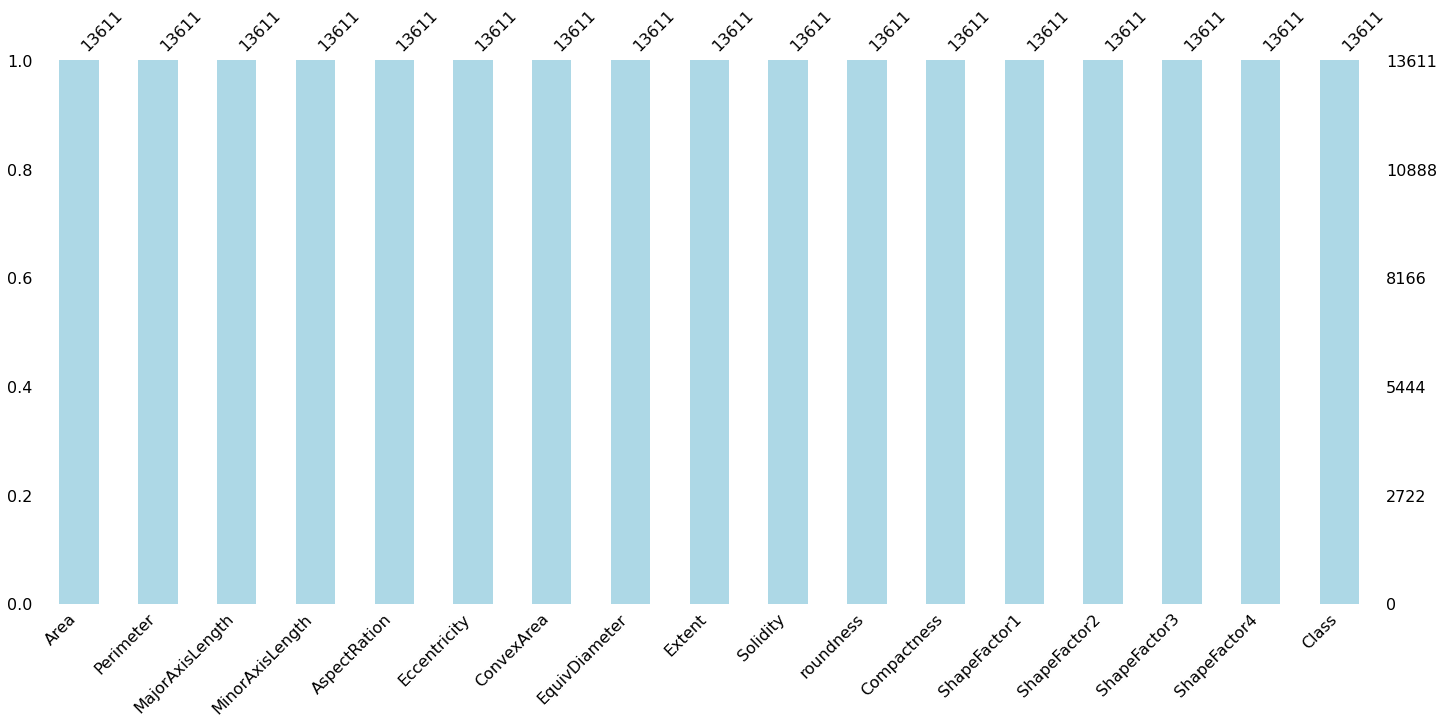

In [18]:
import missingno as no
no.bar(df, color='lightblue')

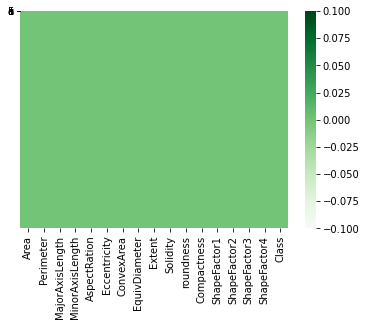

In [26]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Greens')

<Figure size 1008x576 with 0 Axes>

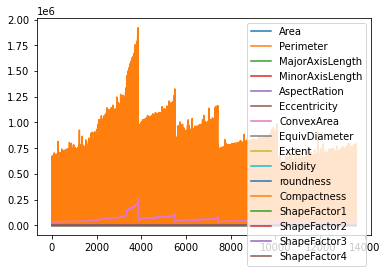

In [27]:
plt.figure(figsize=(14,8))
df.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


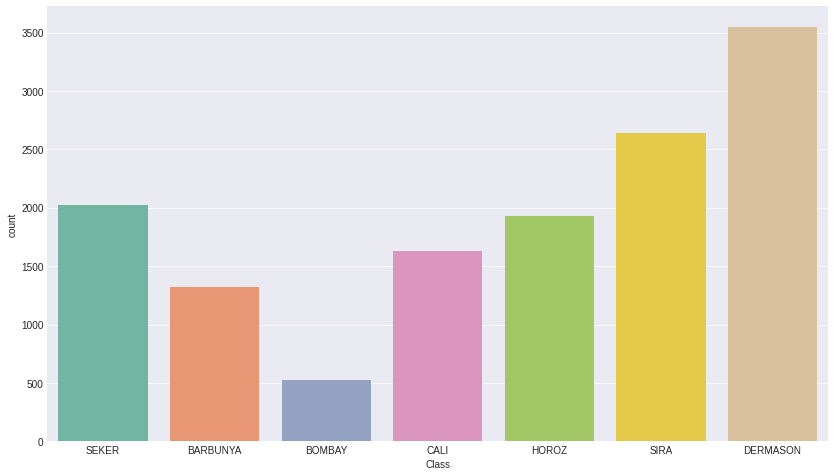

In [28]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(df.Class, palette='Set2')
plt.show()

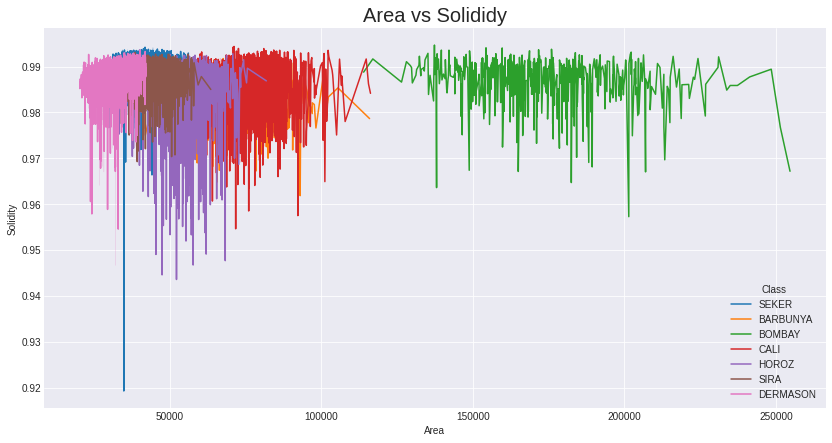

In [34]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Area" , y="Solidity" , hue="Class" , data=df)
plt.title('Area vs Solididy', fontsize = 20)
plt.show()

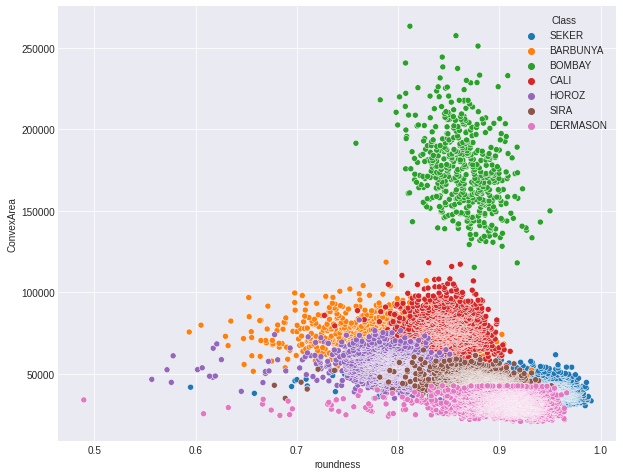

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.roundness , y=df['ConvexArea'], hue=df.Class )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; y

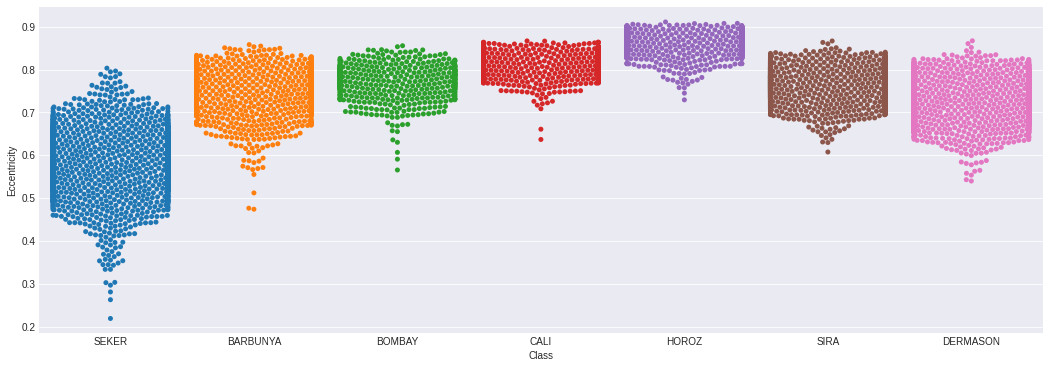

In [37]:
plt.figure(figsize=(18,6))
sns.swarmplot(x="Class" , y = "Eccentricity" ,data=df)
plt.show()

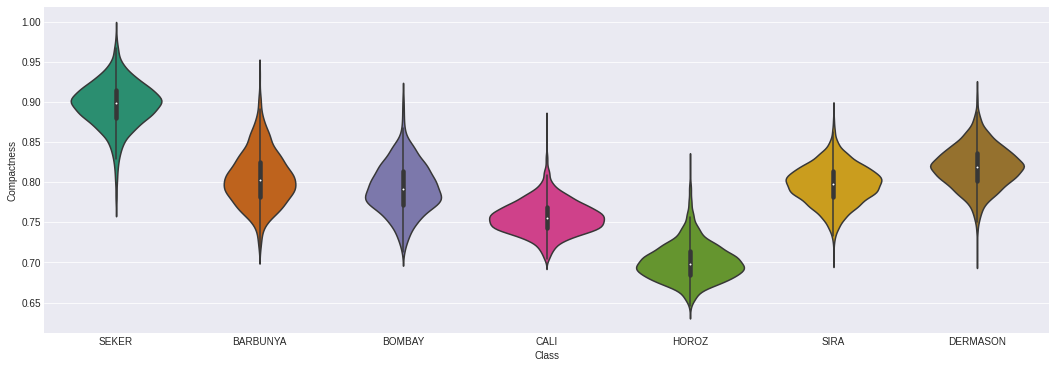

In [39]:
plt.figure(figsize=(18,6))
sns.violinplot(x=df.Class, y=df.Compactness, palette='Dark2')
plt.show()

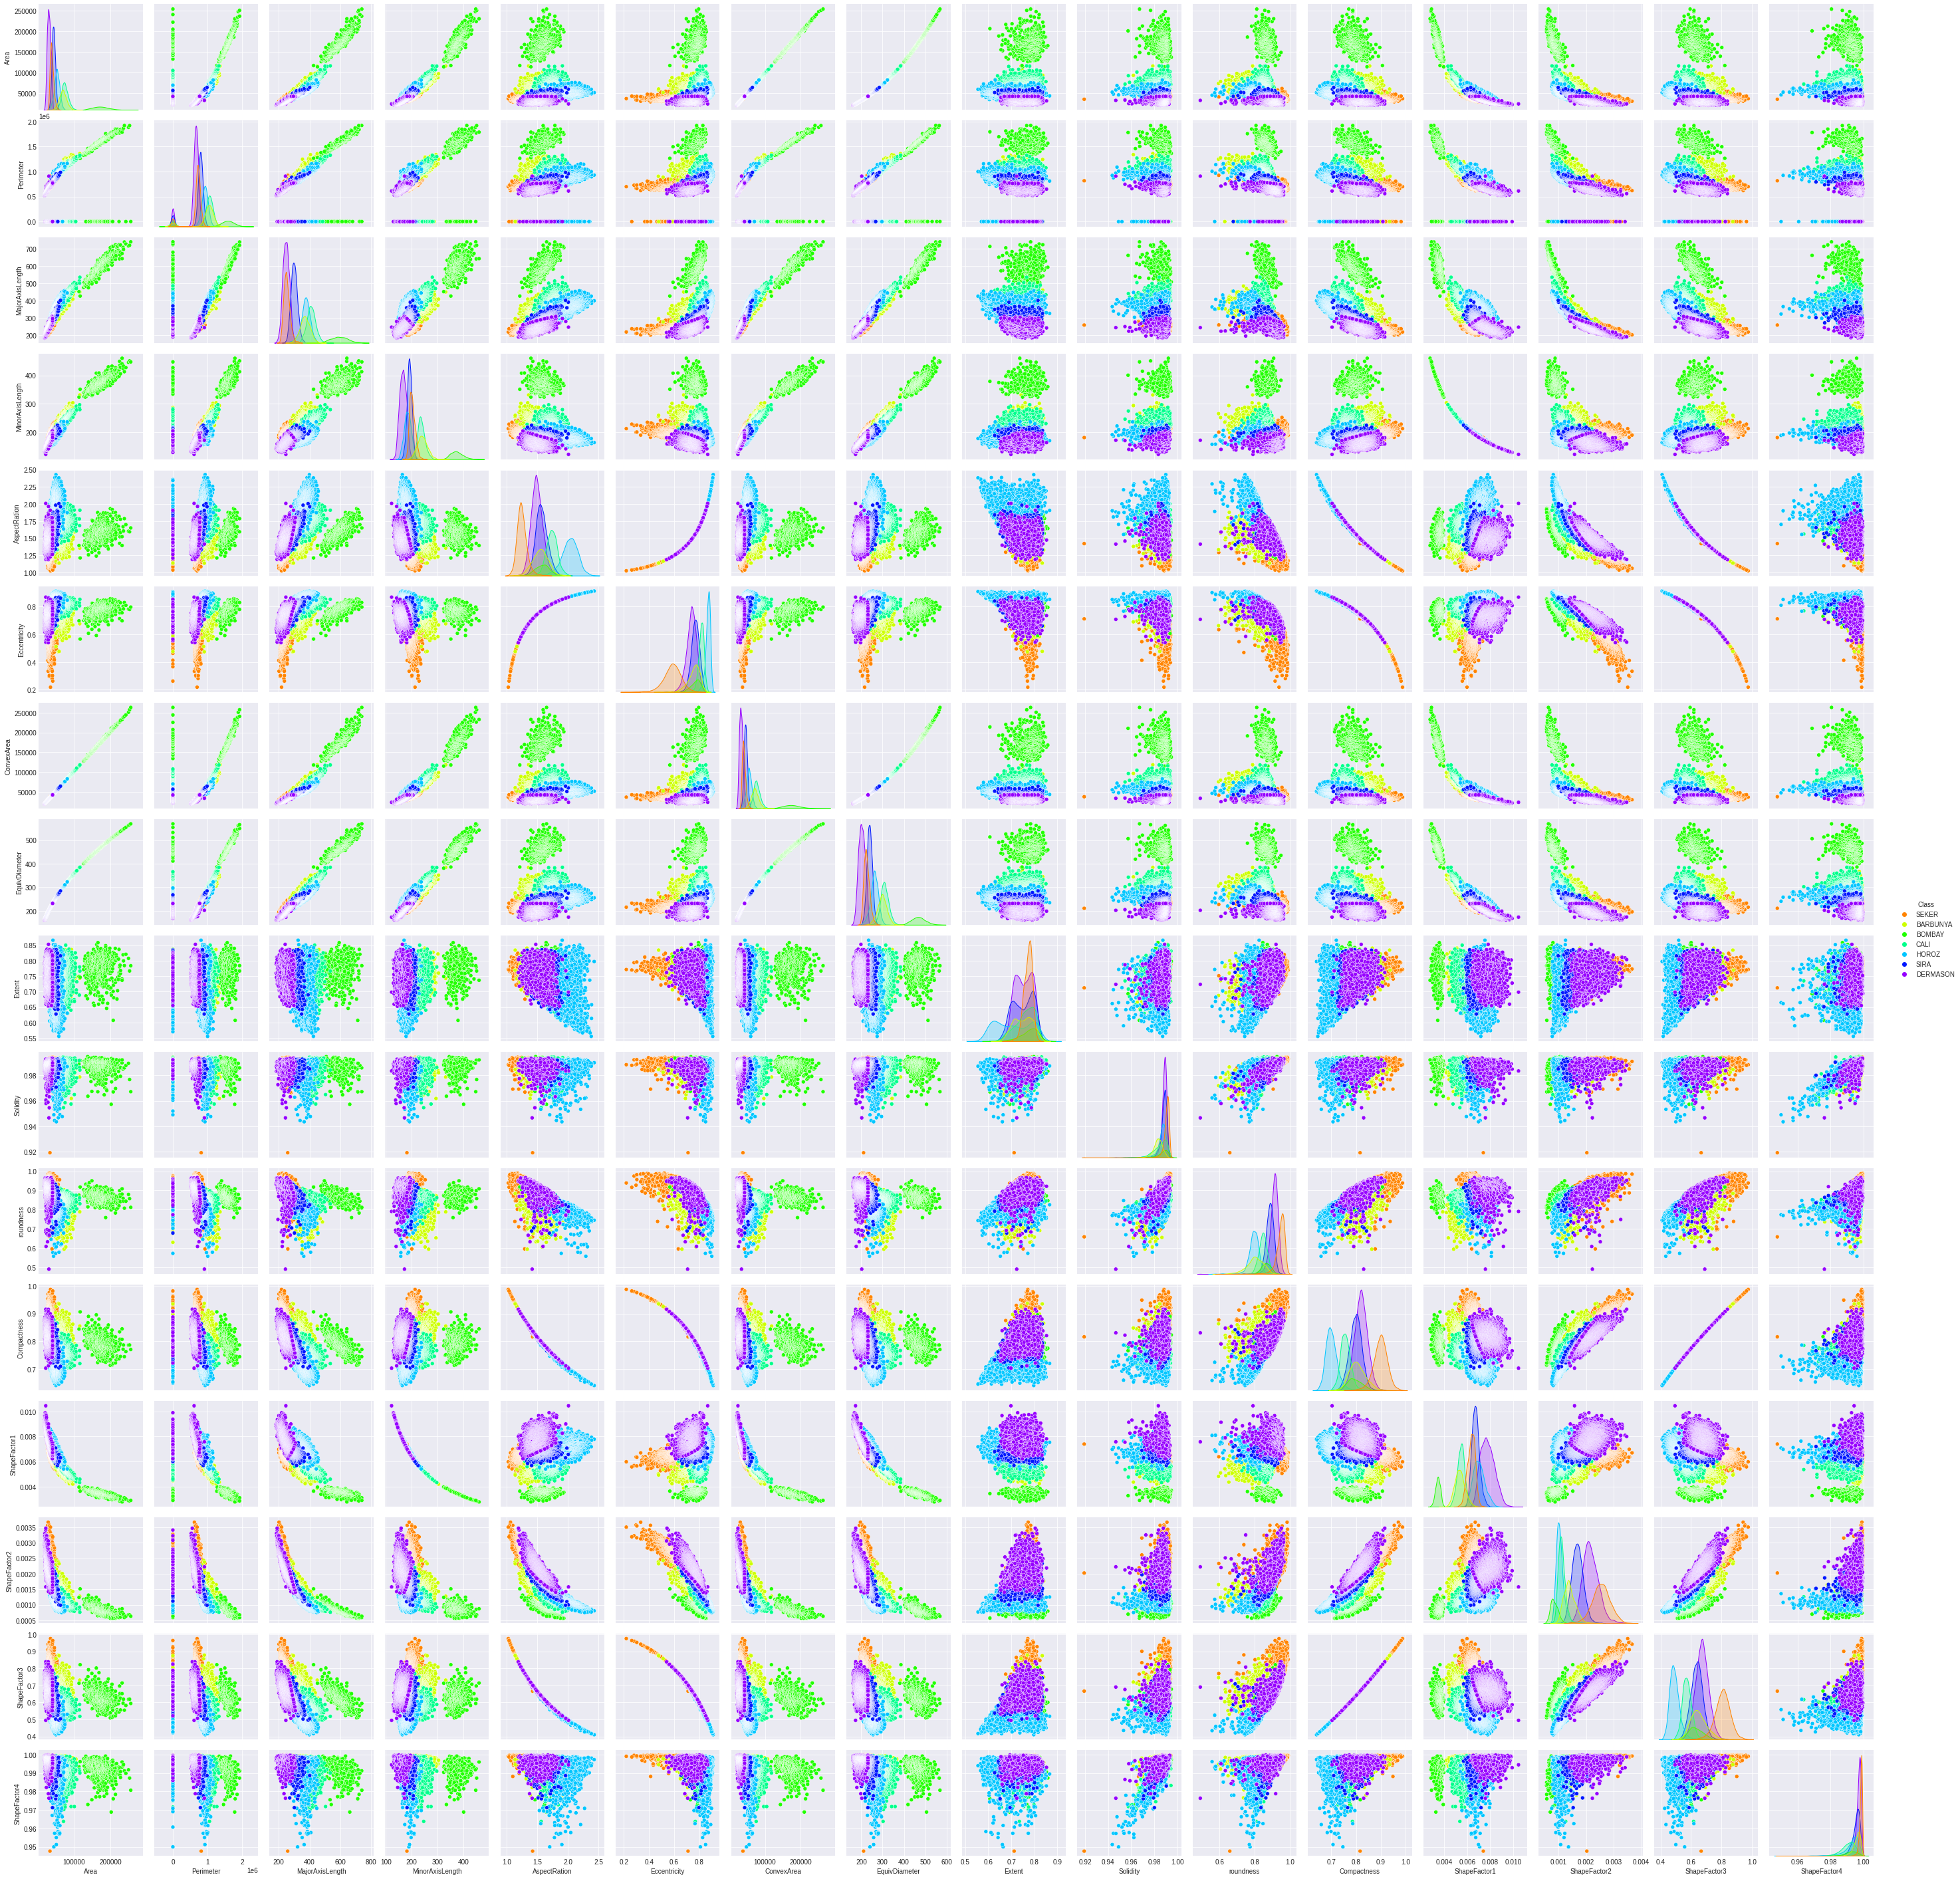

In [42]:
sns.pairplot(df, hue = 'Class', palette='gist_rainbow')
plt.show()

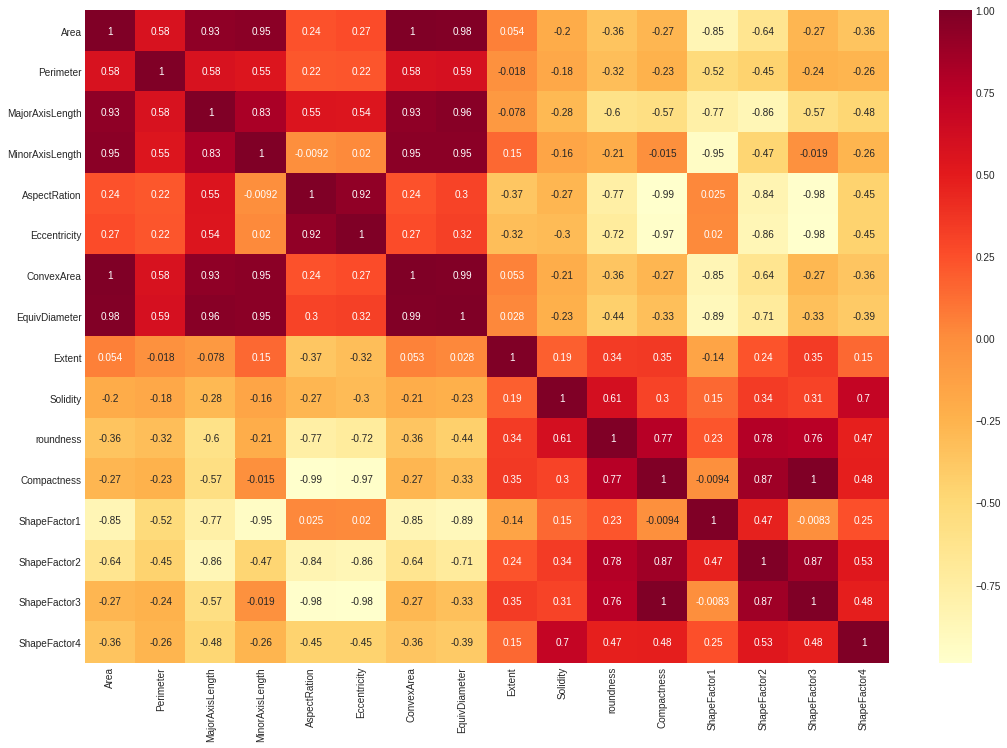

In [44]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlOrRd')
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()
category = ['Class']
df[category] = df[category].apply(lambda x:labelencoding.fit_transform(x))
df

Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0      28395  610291.00       208.178117  ...      0.834222      0.998724      5
1      28734  638018.00       200.524796  ...      0.909851      0.998430      5
2      29380     624.11       212.826130  ...      0.825871      0.999066      5
3      30008  645884.00       210.557999  ...      0.861794      0.994199      5
4      30140  620134.00       201.847882  ...      0.941900      0.999166      5
...      ...        ...              ...  ...           ...           ...    ...
13606  42097  759696.00       288.721612  ...      0.642988      0.998385      3
13607  42101  757499.00       281.576392  ...      0.676099      0.998219      3
13608  42139  759321.00       281.539928  ...      0.676884      0.996767      3
13609  42147  763779.00       283.382636  ...      0.668237      0.995222      3
13610  42159  772237.00       295.142741  ...      0.616221      0.998180      3

[13611 rows x 17 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

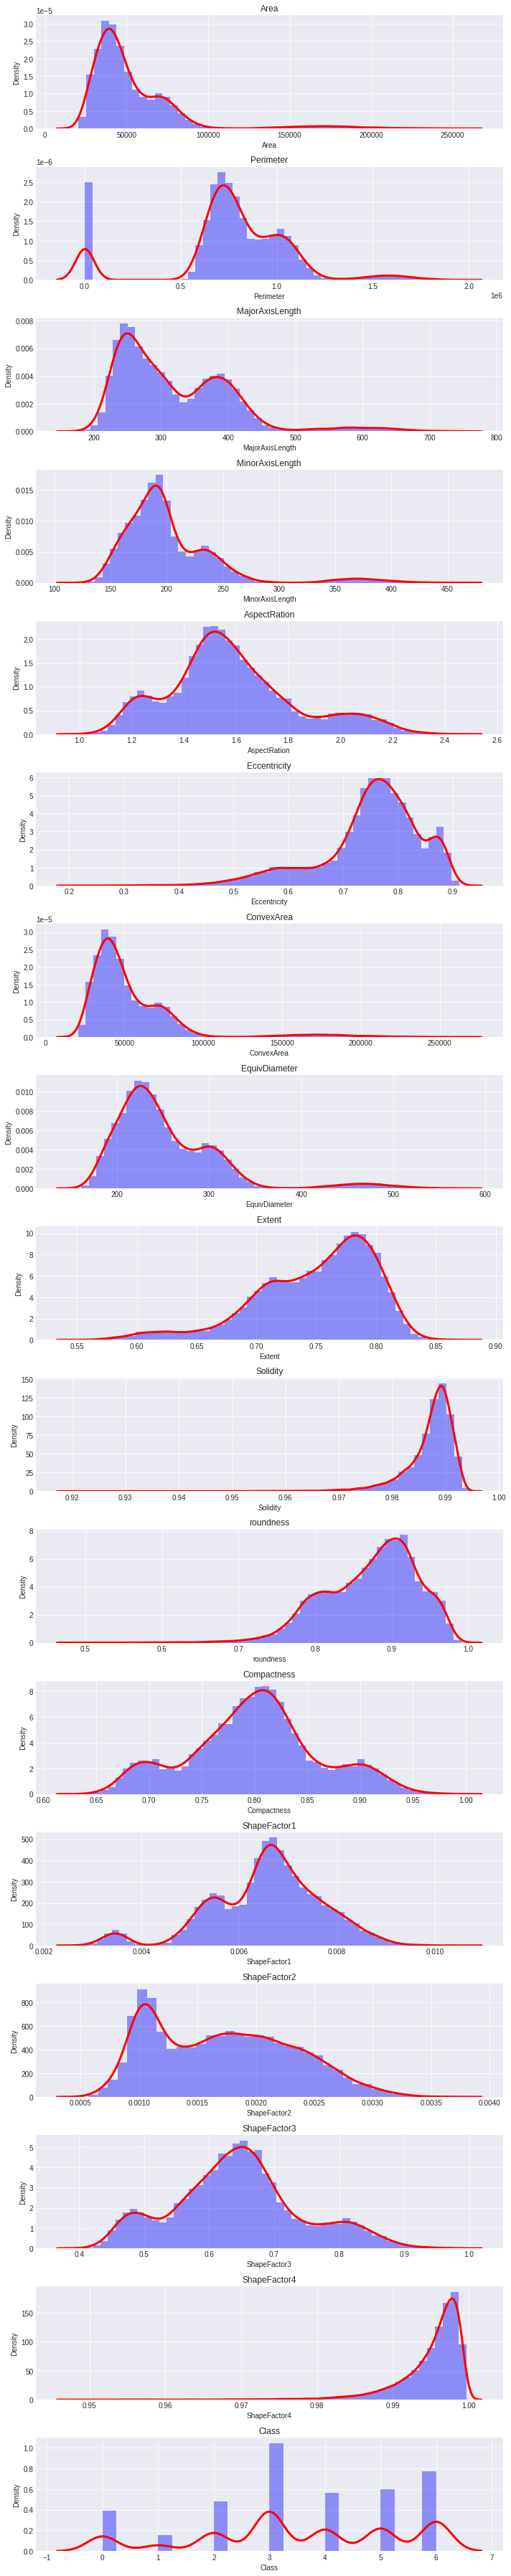

In [47]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
  plt.title(df.columns[i])
  
plt.tight_layout()

# Splitting the Data into Dependent and Independent Variables

In [49]:
x = df.drop(['Class'], axis=1)
y = df.Class

# Feature Importance

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.06938247 0.03666593 0.09022557 0.08295152 0.07585312 0.06474796
 0.06146656 0.07381428 0.01467674 0.01973916 0.064016   0.07292609
 0.08436683 0.08014703 0.08048219 0.02853856]


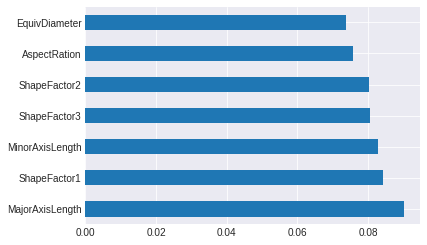

In [54]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(7).plot(kind='barh')

# Training and Testing the Data

In [82]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=15)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [160]:
lm = LogisticRegression(random_state=20, n_jobs=5)
lm.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=5, penalty='l2', random_state=20,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

## Prediction

In [161]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)

## Confusion Matrix

In [162]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[  0,  44,   9,  16,   0,   0, 330],
       [  0,  13, 132,   0,   0,   0,   0],
       [  0,  52,  48,   1,   0,   0, 399],
       [  0, 104,   0, 939,   0,   0,   0],
       [  0,  55,   0, 261,   0,   0, 269],
       [  0,  55,   0, 487,   0,   0,  67],
       [  0,  77,   0, 587,   0,   0, 139]])

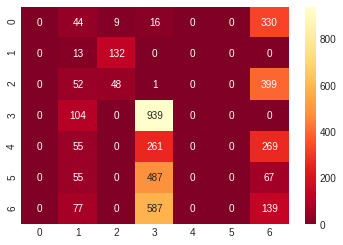

In [163]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

## Accuracy

In [164]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 28.655400440852315
Accuracy of testing data: 27.889324191968655


## Classification Report

In [170]:
target_names = ['Class']
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       399
           1       0.03      0.09      0.05       145
           2       0.25      0.10      0.14       500
           3       0.41      0.90      0.56      1043
           4       0.00      0.00      0.00       585
           5       0.00      0.00      0.00       609
           6       0.12      0.17      0.14       803

    accuracy                           0.28      4084
   macro avg       0.12      0.18      0.13      4084
weighted avg       0.16      0.28      0.19      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decission Tree

In [172]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Prediction

In [173]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Confusion Matrix

In [174]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[355,   0,  19,   0,   6,   6,  13],
       [  0, 144,   0,   0,   0,   0,   0],
       [ 30,   0, 467,   0,  15,   1,   3],
       [  0,   0,   0, 909,   3,  14,  78],
       [  3,   0,   9,   4, 542,   0,  15],
       [  5,   1,   0,  28,   0, 567,  23],
       [  6,   0,   5, 102,  19,  21, 671]])

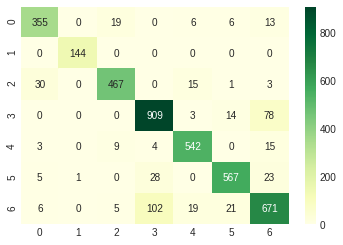

In [175]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

[Text(167.4, 190.26, 'X[2] <= 280.712\ngini = 0.827\nsamples = 9527\nvalue = [923, 377, 1130, 2503, 1343, 1418, 1833]'), Text(83.7, 135.9, 'X[12] <= 0.007\ngini = 0.541\nsamples = 4039\nvalue = [4, 0, 1, 2380, 11, 1309, 334]'), Text(41.85, 81.53999999999999, 'X[11] <= 0.853\ngini = 0.227\nsamples = 1408\nvalue = [4, 0, 1, 70, 1, 1232, 100]'), Text(20.925, 27.180000000000007, 'gini = 0.571\nsamples = 153\nvalue = [0, 0, 0, 43, 1, 21, 88]'), Text(62.775000000000006, 27.180000000000007, 'gini = 0.068\nsamples = 1255\nvalue = [4, 0, 1, 27, 0, 1211, 12]'), Text(125.55000000000001, 81.53999999999999, 'X[3] <= 176.645\ngini = 0.22\nsamples = 2631\nvalue = [0, 0, 0, 2310, 10, 77, 234]'), Text(104.625, 27.180000000000007, 'gini = 0.068\nsamples = 2000\nvalue = [0, 0, 0, 1930, 10, 4, 56]'), Text(146.475, 27.180000000000007, 'gini = 0.544\nsamples = 631\nvalue = [0, 0, 0, 380, 0, 73, 178]'), Text(251.10000000000002, 135.9, 'X[14] <= 0.531\ngini = 0.791\nsamples = 5488\nvalue = [919, 377, 1129, 12

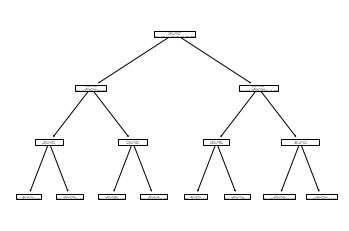

In [176]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(xtrain, ytrain)
print(tree.plot_tree(clf_tree))

## Accuracy

In [177]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 100.0
Accuracy of testing data: 89.49559255631733


## Classification Report

In [182]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       399
           1       1.00      0.99      1.00       145
           2       0.91      0.93      0.92       500
           3       0.91      0.87      0.89      1043
           4       0.95      0.93      0.94       585
           5       0.91      0.93      0.92       609
           6       0.81      0.84      0.82       803

    accuracy                           0.89      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.89      0.90      4084



# K Nearest Neighbour

In [184]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Prediction

In [185]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

## Confusion Matrix

In [186]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[205,   1, 100,   0,  63,   2,  11],
       [  0, 144,   0,   0,   0,   0,   0],
       [113,   0, 391,   0,  13,   0,   4],
       [  0,   0,   0, 907,  10,  97,  89],
       [ 76,   0,   8,   4, 471,   7,  34],
       [  0,   0,   0,  68,   1, 441,  30],
       [  5,   0,   1,  64,  27,  62, 635]])

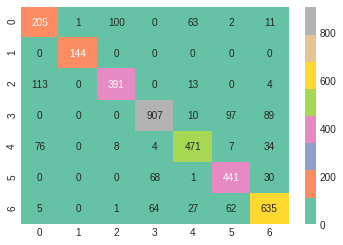

In [187]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set2" ,fmt='g')

## Accuracy

In [188]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 86.82691298415031
Accuracy of testing data: 78.20763956904995


## Classification Report

In [189]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52       399
           1       1.00      0.99      1.00       145
           2       0.75      0.78      0.77       500
           3       0.82      0.87      0.85      1043
           4       0.79      0.81      0.79       585
           5       0.82      0.72      0.77       609
           6       0.80      0.79      0.80       803

    accuracy                           0.78      4084
   macro avg       0.79      0.78      0.78      4084
weighted avg       0.78      0.78      0.78      4084



# Random Forest

In [190]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [191]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Confusion Matrix

In [192]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[365,   1,  12,   0,   3,   3,   6],
       [  0, 144,   0,   0,   0,   0,   0],
       [ 23,   0, 476,   0,   9,   0,   2],
       [  0,   0,   0, 967,   2,  11,  69],
       [  3,   0,   8,   1, 557,   0,   8],
       [  1,   0,   0,  18,   0, 576,  11],
       [  7,   0,   4,  57,  14,  19, 707]])

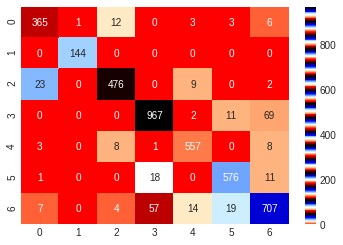

In [193]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="flag" ,fmt='g')

## Accuracy

In [194]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 100.0
Accuracy of testing data: 92.85014691478942


## Classification Report

In [195]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       399
           1       1.00      0.99      1.00       145
           2       0.93      0.95      0.94       500
           3       0.92      0.93      0.92      1043
           4       0.97      0.95      0.96       585
           5       0.95      0.95      0.95       609
           6       0.88      0.88      0.88       803

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



# Comparing Accuracy

In [196]:
accuracy =  {ac1: 'Logistic Regression', ac2:'Decission Tree', ac3:'KNN', ac4: 'Random Forest'}

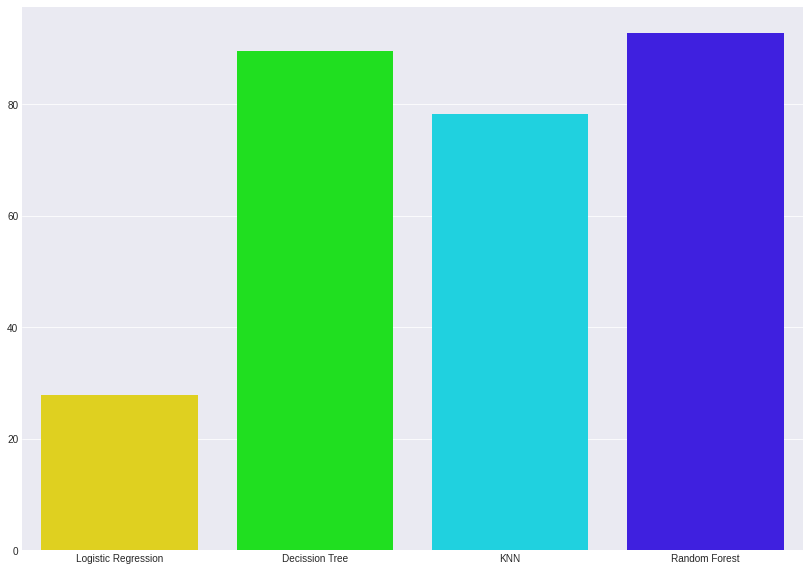

In [199]:
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

As accuracy of Random Forest Classifier algorithm is more ie. **92.85%** ~ **93%**

Hence we will save the model.

# Saving the Model

In [200]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

# Sample Prediction

In [219]:
p = rf.predict([[28395,	610291.00,	208.178117,	173.888747,	1.197191,	0.549812,	
                 28715,	190.141097,	0.763923,	0.988856,	0.958027,	
                 0.913358,	0.007332,	0.003147,	0.834222,	0.998724]])
print("Class = ", p)

Class =  [5]
